In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from downsample import downsample


Sigma

In [3]:
#ARCHIVO
reg='604'
FitsFile= 'Obs/TAURUS.604.O.Sigma'
hdul=fits.open(FitsFile + '.fits')

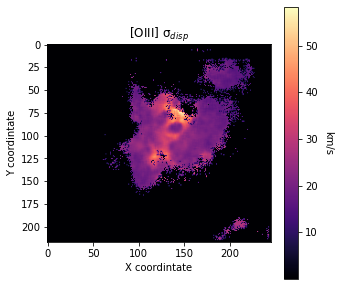

In [4]:
#IMAGEN S
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='magma')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.title('[OIII] σ$_{disp}$')


plt.savefig('TAURUS/'+reg+'SO.png')

In [5]:
#TABLA DATOS
sig=hdul[0].data
df=pd.DataFrame(sig)

In [6]:
#df=df.reindex(index=df.index[::-1])

In [7]:
dsig=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'Sig'})
dsig.describe()

,Y,X,Sig
count,53165.000000,53165.000000,5.316500e+04
mean,108.000000,122.000000,4.433354e+00
std,62.642428,70.725484,9.644502e+00
min,0.000000,0.000000,1.457178e-08
25%,54.000000,61.000000,1.457178e-08
50%,108.000000,122.000000,1.457178e-08
75%,162.000000,183.000000,1.457178e-08
max,216.000000,244.000000,5.829112e+01


In [8]:
#dsig.Sig=dsig.Sig.values[::-1]
#dsig.describe()

Brillo emisión

In [9]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.604.O.Flux'
hdul=fits.open(FitsFile + '.fits')

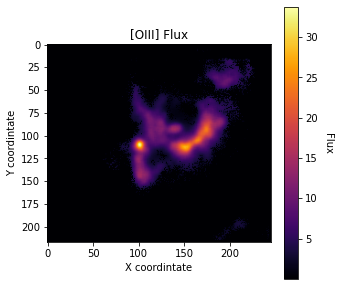

In [10]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('[OIII] Flux')


plt.savefig('TAURUS/'+reg+'FO.png')

In [11]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)

In [12]:
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,53165.000000,53165.000000,5.316500e+04
mean,108.000000,122.000000,1.296366e+00
std,62.642428,70.725484,3.449498e+00
min,0.000000,0.000000,8.434807e-09
25%,54.000000,61.000000,8.434807e-09
50%,108.000000,122.000000,8.434807e-09
75%,162.000000,183.000000,8.434807e-09
max,216.000000,244.000000,3.374002e+01


Velocidad Radial

In [13]:
#ARCHIVO
FitsFile= FitsFile= 'Obs/TAURUS.604.O.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')

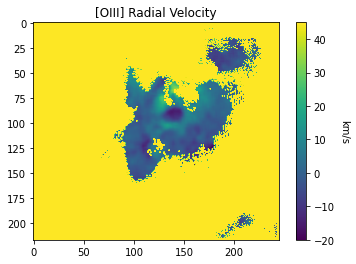

In [14]:
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-20,45) 
plt.title('[OIII] Radial Velocity')

plt.savefig('TAURUS/'+reg+'RVO.png')

In [15]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
#dfv=df.stack()
#dfv

In [16]:
dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,53165.000000,53165.000000,53165.000000
mean,108.000000,122.000000,159.964736
std,62.642428,70.725484,76.438049
min,0.000000,0.000000,-20.419067
25%,54.000000,61.000000,196.610001
50%,108.000000,122.000000,196.610001
75%,162.000000,183.000000,196.610001
max,216.000000,244.000000,196.610001


Tabla General

In [17]:
data=dfvr
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,Y,X,RV,I,Sig
count,53165.000000,53165.000000,53165.000000,5.316500e+04,5.316500e+04
mean,108.000000,122.000000,159.964736,1.296366e+00,4.433354e+00
std,62.642428,70.725484,76.438049,3.449498e+00,9.644502e+00
min,0.000000,0.000000,-20.419067,8.434807e-09,1.457178e-08
25%,54.000000,61.000000,196.610001,8.434807e-09,1.457178e-08
50%,108.000000,122.000000,196.610001,8.434807e-09,1.457178e-08
75%,162.000000,183.000000,196.610001,8.434807e-09,1.457178e-08
max,216.000000,244.000000,196.610001,3.374002e+01,5.829112e+01


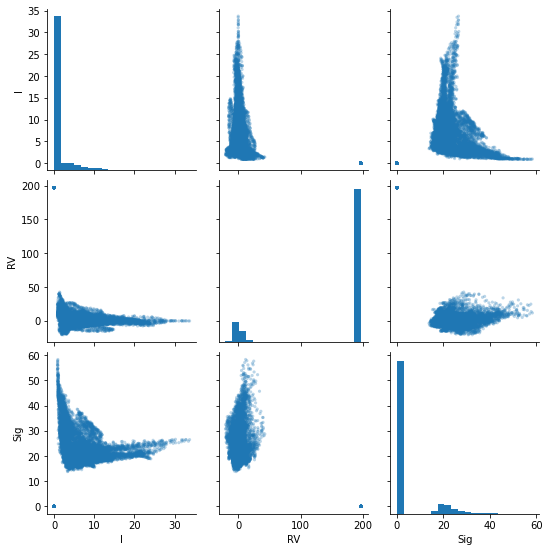

In [18]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [19]:
#mI=(data.I>data.I.mean()+0.1*data.I.std())&(data.Sig>data.Sig.mean()+0.1*data.Sig.std())

In [20]:
mI=(data.I>0.01)#&(data.RV<100)&(data.Sig>2)

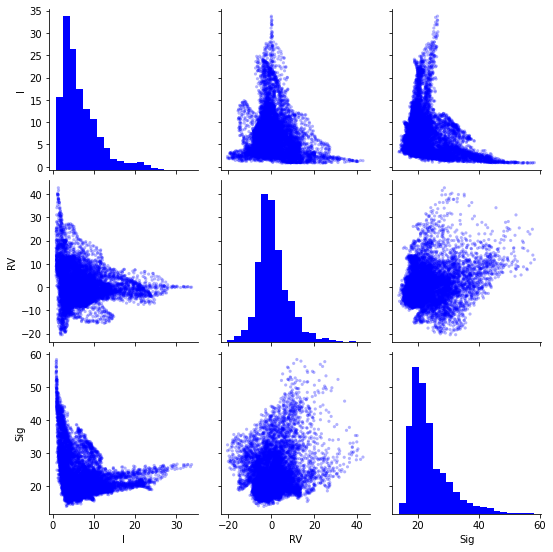

In [21]:
sns.pairplot(data[mI], 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='blue'),
             diag_kws=dict(bins=20, color="blue"),
            )

plt.savefig('TAURUS/'+reg+'CorrlHO.png')

In [22]:
data[mI].describe()

,Y,X,RV,I,Sig
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000
mean,93.098794,146.934372,0.806432,6.926762,23.688366
std,36.468470,36.442206,7.407126,4.957822,6.393887
min,5.000000,61.000000,-20.419067,0.831013,13.826577
25%,69.000000,115.000000,-3.625504,3.413030,19.352822
50%,94.000000,144.000000,-0.407211,5.422667,21.840129
75%,118.000000,178.000000,4.156876,9.048186,26.154775
max,214.000000,242.000000,42.600693,33.740025,58.291119


In [23]:
data=data[mI]

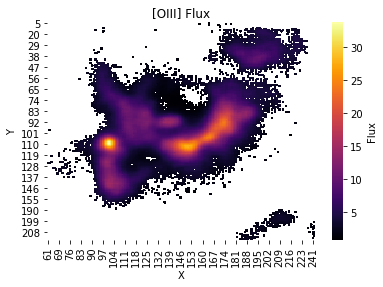

In [24]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('[OIII] Flux')

plt.savefig('TAURUS/Imgs/A/'+reg+'FO.png')

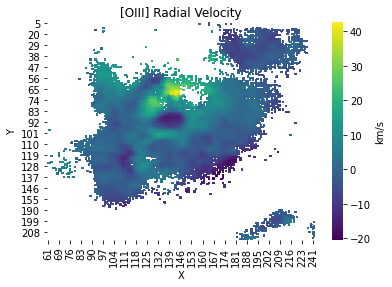

In [25]:
datal=data.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.title('[OIII] Radial Velocity')

plt.savefig('TAURUS/Imgs/A/'+reg+'RVO.png')

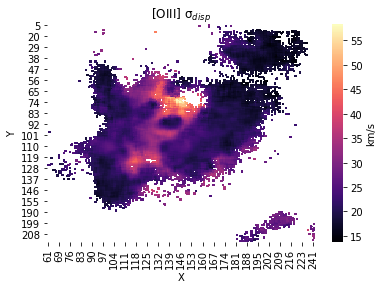

In [26]:
datal=data.copy()
dataH_s=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
plt.title('[OIII] σ$_{disp}$')
plt.savefig('TAURUS/Imgs/A/'+reg+'SO.png')

Text(0, 0.5, '$σ_{disp}$ [km/s]')

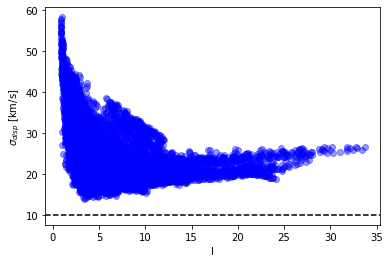

In [27]:
fig, ax = plt.subplots()
plt.scatter(data.I,data.Sig, alpha=0.4,color='blue')
#plt.title(LineN[i])
plt.axhline(y=10, color='k', linestyle='--')
ax.set_xlabel('I')
ax.set_ylabel('$σ_{disp}$ [km/s]')

Downsample

In [28]:
mingoods=[1]

In [29]:
I=dataH_f.copy()
I=np.array(I)
m=pd.notna(I)

In [30]:
for mingood in zip(mingoods):
    [I],m= downsample([I],m,weights=None,mingood=mingood)

In [31]:
RV=dataH_rv.copy()
RV=np.array(RV)
m=pd.notna(RV)

In [32]:
for mingood in zip(mingoods):
    [RV],m= downsample([RV],m,weights=None,mingood=mingood)

In [33]:
Sg=dataH_s.copy()
Sg=np.array(Sg)
m=pd.notna(Sg)

In [34]:
for mingood in zip(mingoods):
    [Sg],m= downsample([Sg],m,weights=None,mingood=mingood)

In [35]:
Ip=pd.DataFrame(I)
dfi=Ip.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})

RVp=pd.DataFrame(RV)
dfrv=RVp.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})

Sgp=pd.DataFrame(Sg)
dfs=Sgp.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'Sig'})


df=pd.concat([dfrv,dfi.I, dfs.Sig],axis=1)
df.describe()

,Y,X,RV,I,Sig
count,6342.000000,6342.000000,6342.000000,6342.000000,6342.000000
mean,45.071113,40.909965,0.236234,2.447477,7.068716
std,25.942183,24.875002,3.721853,4.636974,11.262203
min,0.000000,0.000000,-18.300000,0.000000,0.000000
25%,23.000000,20.000000,0.000000,0.000000,0.000000
50%,45.000000,40.000000,0.000000,0.000000,0.000000
75%,68.000000,62.000000,0.000000,4.011250,18.651250
max,88.000000,84.000000,39.930000,33.097500,55.187500


In [36]:
mI=df.I>df.I.mean()+0.05*df.I.std()
df=df[mI]

df.describe()

,Y,X,RV,I,Sig
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,41.527716,40.554878,0.169030,8.492970,22.586993
std,15.377982,17.200517,5.913828,4.928971,4.719002
min,3.000000,10.000000,-18.300000,2.680000,15.002500
25%,32.000000,25.000000,-3.450000,4.950625,19.272500
50%,43.000000,39.000000,-0.577500,7.108750,21.387500
75%,52.000000,56.000000,3.301875,10.508750,24.440000
max,81.000000,80.000000,26.872500,33.097500,43.042500


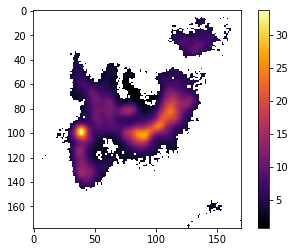

In [37]:
plt.figure(1)
plt.imshow(dataH_f, cmap='inferno')
plt.colorbar()


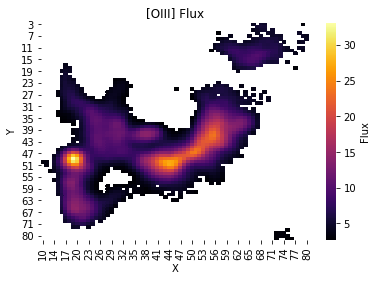

In [38]:

plt.figure(2)
datal=df.copy()
dataH_f2=(datal.round(2)).pivot(index='Y', columns='X', values='I')
sns.heatmap(dataH_f2, cmap="inferno",cbar_kws={'label': 'Flux'})
plt.title('[OIII] Flux')
plt.savefig('TAURUS/Imgs/B/'+reg+'FO.png')

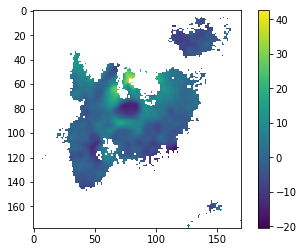

In [39]:
plt.figure(1)
plt.imshow(dataH_rv, cmap='viridis')
plt.colorbar()



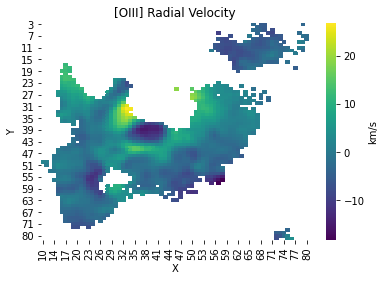

In [40]:
plt.figure(2)
datal=df.copy()
dataH_rv2=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv2, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.title('[OIII] Radial Velocity')
plt.savefig('TAURUS/Imgs/B/'+reg+'RVO.png')

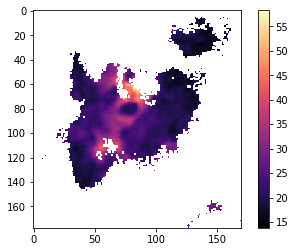

In [41]:
plt.figure()
plt.imshow(dataH_s, cmap='magma')
plt.colorbar()



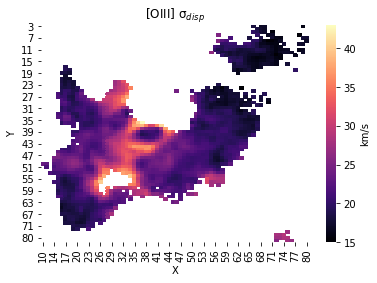

In [42]:
plt.figure()
datal=df.copy()
dataH_s2=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
sns.heatmap(dataH_s2, cmap="magma",cbar_kws={'label': 'km/s'})
plt.title('[OIII] σ$_{disp}$')
plt.savefig('TAURUS/Imgs/B/'+reg+'SO.png')

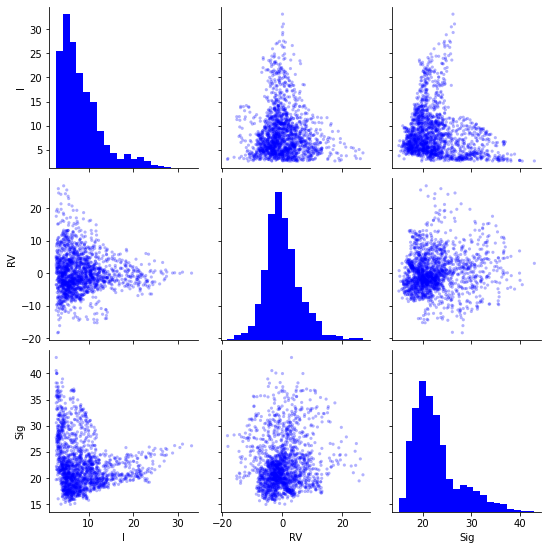

In [43]:
sns.pairplot(df, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='blue'),
             diag_kws=dict(bins=20,color='blue'),
            )

plt.savefig('TAURUS/'+reg+'CorrlOB.png')

In [44]:
#df.to_csv('TAURUS/Data/'+reg+'O.csv')

In [45]:
df.to_csv('Res/ 604TOB.csv')

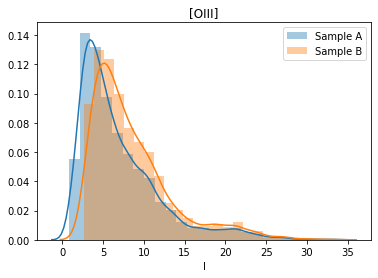

In [46]:
sns.distplot(data.I,bins=25,label='Sample A')
sns.distplot(df.I,bins=25,label='Sample B')
plt.legend()
plt.title('[OIII]')
plt.savefig('TAURUS/Imgs/Hist/'+reg+'FO.png')

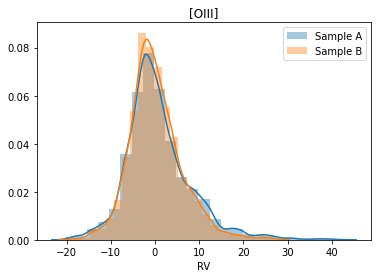

In [47]:
sns.distplot(data.RV,bins=25,label='Sample A')
sns.distplot(df.RV,bins=25,label='Sample B')
plt.legend()
plt.title('[OIII]')
plt.savefig('TAURUS/Imgs/Hist/'+reg+'RVO.png')

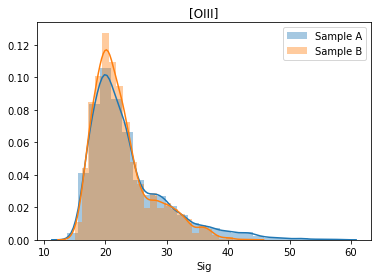

In [48]:
sns.distplot(data.Sig,bins=25,label='Sample A')
sns.distplot(df.Sig,bins=25,label='Sample B')
plt.legend()
plt.title('[OIII]')
plt.savefig('TAURUS/Imgs/Hist/'+reg+'SVO.png')

In [49]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 19.778750896453857 seconds ---
